In [0]:
# Import necessry libaries

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from numpy import random, float, array
import numpy as np
import seaborn as sns

In [0]:
# load dataset
data = pd.read_csv('TamilNadu_Crime_Data_2001_2012.csv')

In [33]:
# dataset shape

data.shape

(1440, 7)

In [3]:
# datadest information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
CRIME_YEAR                           1440 non-null int64
CRIME_STATE                          1440 non-null object
CRIME_CITY                           1440 non-null object
CRIME_CITY_LATTITUDE                 1440 non-null float64
CRIME_CITY_LONGTITUDE                1440 non-null float64
CRIME_TYPE                           1440 non-null object
NUMBER_OF_CRIME_IN_THE_CRIME_TYPE    1440 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 78.9+ KB


In [4]:
# dataset statistical description

data.describe()

,CRIME_YEAR,CRIME_CITY_LATTITUDE,CRIME_CITY_LONGTITUDE,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,2006.500000,11.227500,78.388950,178.763194
std,3.453252,1.553465,1.063606,398.961224
min,2001.000000,8.741200,76.955800,0.000000
25%,2003.750000,9.925200,77.694600,10.000000
50%,2006.500000,11.340550,78.132900,43.000000
75%,2009.250000,12.934900,79.146800,125.500000
max,2012.000000,13.082600,80.270700,3779.000000


In [5]:
# dataset summary view

data.head()

,CRIME_YEAR,CRIME_STATE,CRIME_CITY,CRIME_CITY_LATTITUDE,CRIME_CITY_LONGTITUDE,CRIME_TYPE,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE
0,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,MURDER,91
1,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,ATTEMPT TO MURDER,298
2,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0
3,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,RAPE,28
4,2001,TAMIL NADU,CHENNAI,13.0826,80.2707,OTHER RAPE,28


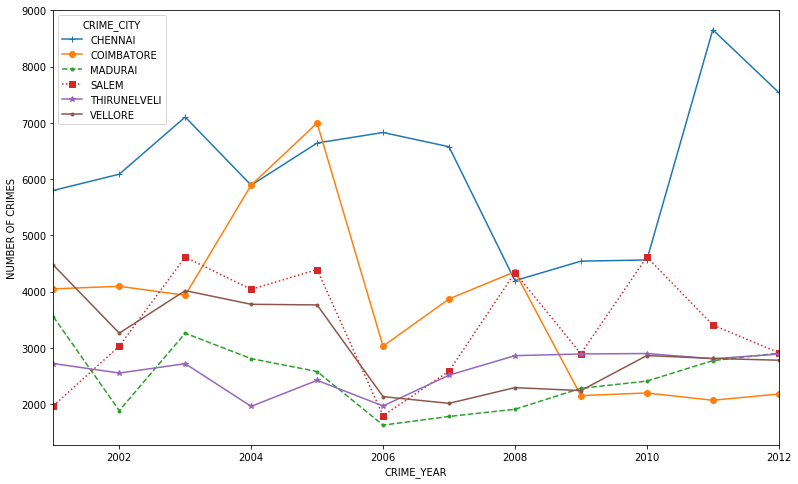

In [31]:
# lineplot - no. of crimes vs year and city

fig, ax = plt.subplots(figsize=(13,8))
ax.set_xlabel('YEARS')
ax.set_ylabel('NUMBER OF CRIMES')
data.groupby(['CRIME_YEAR', 'CRIME_CITY']).sum()['NUMBER_OF_CRIME_IN_THE_CRIME_TYPE'].unstack().plot(ax=ax,style=['+-','o-','.--','s:', '*-', '.-'])


In [0]:
le = LabelEncoder()
# Iterating over all the common columns in train and test
for col in data.columns.values:
  # Encoding only categorical variables
  if data[col].dtypes=='object':
  # Using whole data to form an exhaustive list of levels
    data_copy=data[col].append(data[col])
    le.fit(data_copy.values)
    data[col]=le.transform(data[col])

In [43]:
# after label encoding

data.head()


,CRIME_YEAR,CRIME_STATE,CRIME_CITY,CRIME_CITY_LATTITUDE,CRIME_CITY_LONGTITUDE,CRIME_TYPE,NUMBER_OF_CRIME_IN_THE_CRIME_TYPE
0,2001,0,0,13.0826,80.2707,14,91
1,2001,0,0,13.0826,80.2707,1,298
2,2001,0,0,13.0826,80.2707,7,0
3,2001,0,0,13.0826,80.2707,16,28
4,2001,0,0,13.0826,80.2707,15,28


In [44]:
# after label encoding

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
CRIME_YEAR                           1440 non-null int64
CRIME_STATE                          1440 non-null int64
CRIME_CITY                           1440 non-null int64
CRIME_CITY_LATTITUDE                 1440 non-null float64
CRIME_CITY_LONGTITUDE                1440 non-null float64
CRIME_TYPE                           1440 non-null int64
NUMBER_OF_CRIME_IN_THE_CRIME_TYPE    1440 non-null int64
dtypes: float64(2), int64(5)
memory usage: 78.9 KB


In [0]:
X = data[['CRIME_YEAR', 'CRIME_CITY', 'CRIME_TYPE', 'NUMBER_OF_CRIME_IN_THE_CRIME_TYPE']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 9 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )


In [48]:
clusters_df

,num_clusters,cluster_errors
0,1,5760.000000
1,2,4632.892610
2,3,3704.941349
3,4,3061.285055
4,5,2565.383229
5,6,2251.720343
6,7,1965.971382
7,8,1772.913738
